In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import stats,norm,binom,poisson,expon,boxcox,geom
from scipy.stats import ttest_ind,ttest_1samp,ttest_rel
from scipy.stats import chi2,chisquare,chi2_contingency
from scipy.stats import f_oneway, levene, kruskal, shapiro, mannwhitneyu,probplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kstest
from scipy.stats import pearsonr,spearmanr

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 17.5MB/s]


In [ ]:
df = pd.read_csv("bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [ ]:
df.shape

(10886, 12)

In [ ]:
np.any(df.isna())

False

In [ ]:
np.any(df.duplicated())

False

### **Conversion of categorical attributes to 'category**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
def season_category(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'
df['season'] = df['season'].apply(season_category)

In [ ]:
df['season'] = df['season'].astype('category')

In [ ]:
df['holiday'] = df['holiday'].astype('category')

In [ ]:
df['workingday'] = df['workingday'].astype('category')

In [ ]:
def weather_category(x):
    if x == 1:
        return 'Clear, Few clouds, partly cloudy, partly cloudy'
    elif x == 2:
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif x == 3:
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
df['weather'] = df['weather'].apply(weather_category)

In [ ]:
df['weather'] = df['weather'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,0,1,1


### **Basic Description of the dataset**

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df['season'].value_counts()

Winter    2734
Fall      2733
Summer    2733
Spring    2686
Name: season, dtype: int64

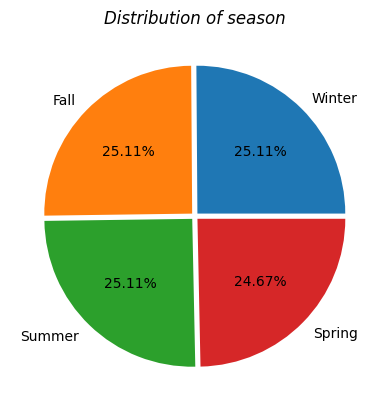

In [ ]:
season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()
plt.title('Distribution of season', fontdict = {'fontstyle' : 'oblique'})
plt.pie(x = season['season'], explode = [0.025, 0.025, 0.025, 0.025], labels = season.index,autopct = '%.2f%%')
plt.show()

In [ ]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

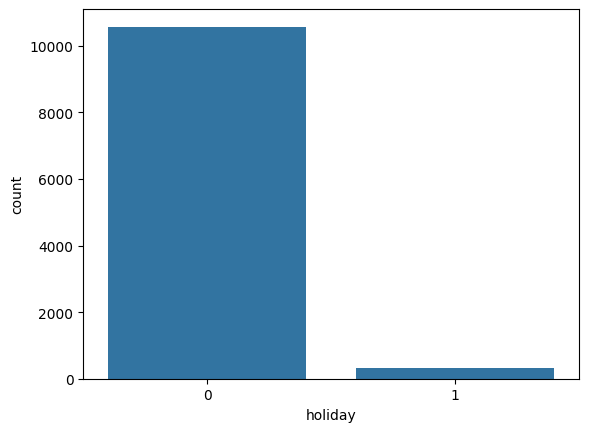

In [ ]:
sns.countplot(data = df, x = 'holiday')
plt.show()

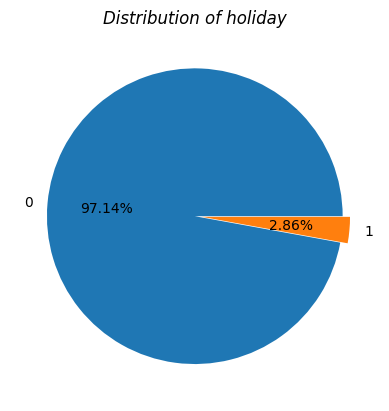

In [ ]:
holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()
plt.title('Distribution of holiday', fontdict = {'fontstyle' : 'oblique'})
plt.pie(x = holiday['holiday'], explode = [0, 0.05], labels = holiday.index,autopct = '%.2f%%')
plt.show()

In [ ]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

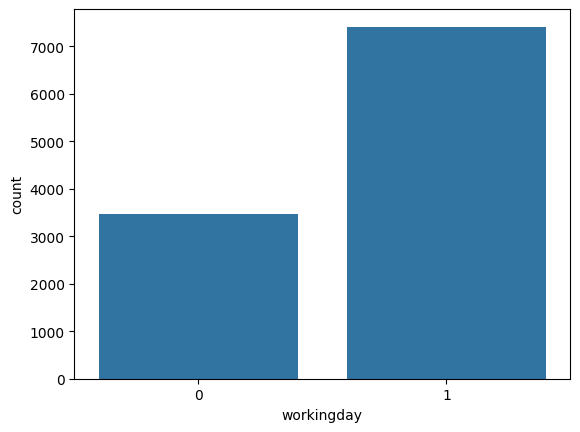

In [ ]:
sns.countplot(data = df, x = 'workingday')
plt.show()

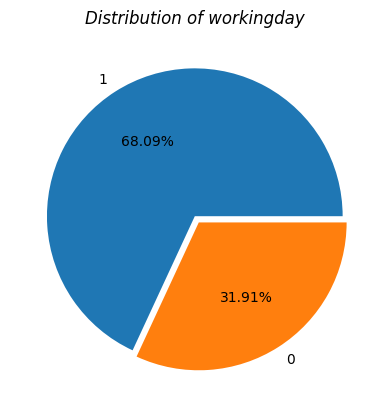

In [ ]:
workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()
plt.title('Distribution of workingday', fontdict = {'fontstyle' : 'oblique'})
plt.pie(x = workingday['workingday'], explode = [0, 0.05], labels = workingday.index,autopct = '%.2f%%')
plt.show()

In [ ]:
df['weather'].value_counts()

Clear, Few clouds, partly cloudy, partly cloudy                                            7192
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               2834
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     859
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                    1
Name: weather, dtype: int64

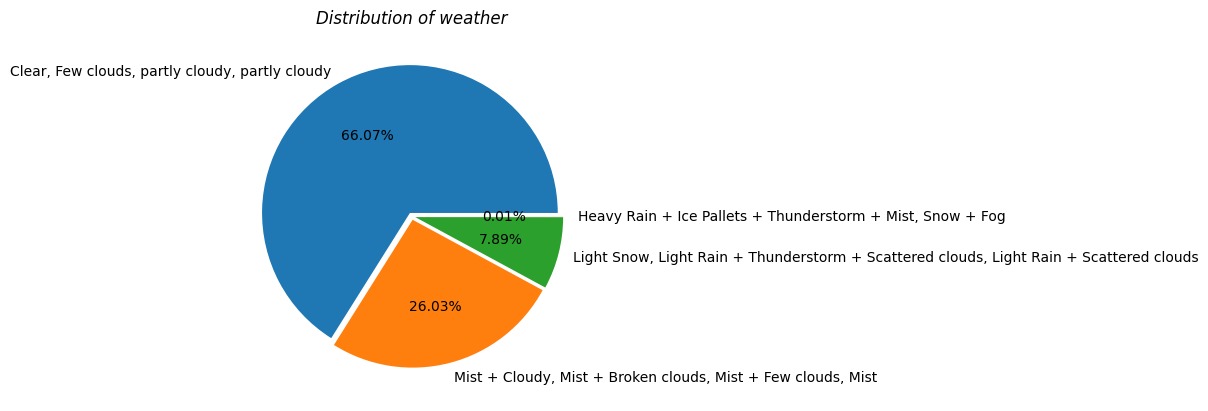

In [ ]:
weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()
plt.title('Distribution of weather', fontdict = {'fontstyle' : 'oblique'})
plt.pie(x = weather['weather'], explode = [0.025, 0.025, 0.025, 0.025],labels = weather.index,autopct = '%.2f%%')
plt.show()

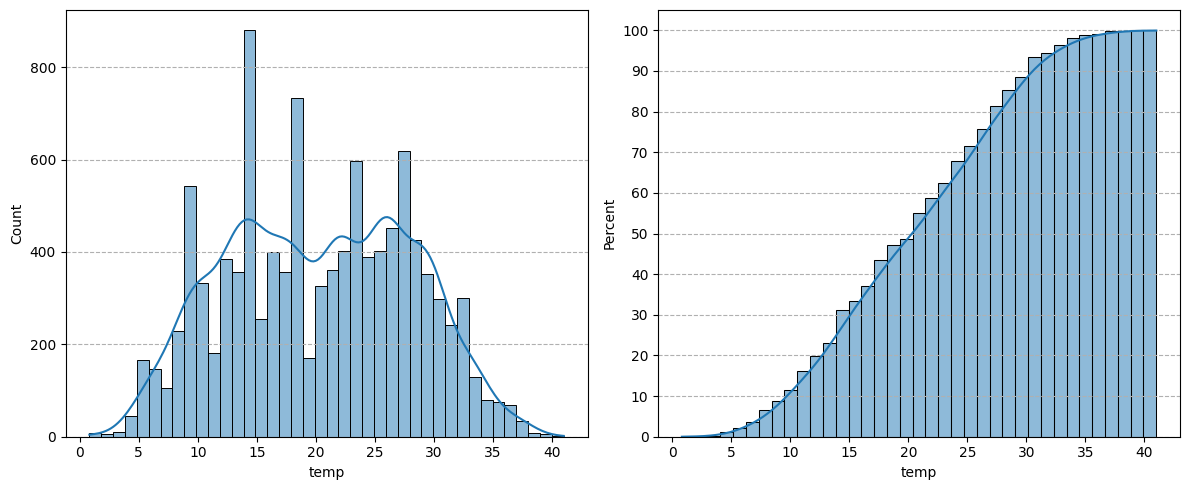

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='temp', kde=True, bins=40)
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='temp', kde=True, cumulative=True, stat='percent')
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

In [ ]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

- The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

- More than 80 % of the time, the temperature is less than 28 degrees celcius.

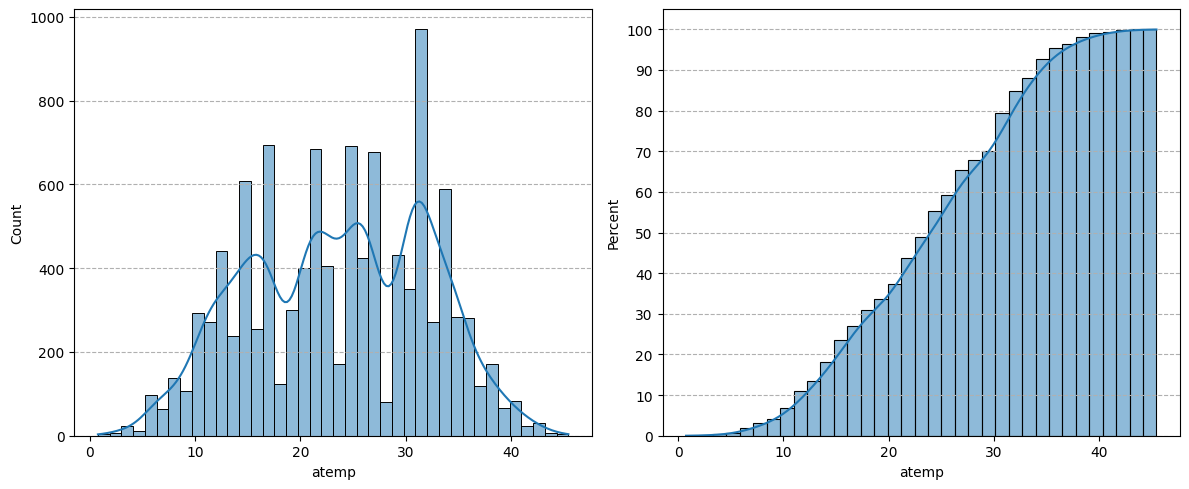

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='atemp', kde=True, bins=40)
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='atemp', kde=True, cumulative=True, stat='percent')
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

In [ ]:
atemp_mean = np.round(df['atemp'].mean(), 2)
atemp_std = np.round(df['atemp'].std(), 2)
atemp_mean, atemp_std

(23.66, 8.47)

- The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.
- More than 80 % of the time, the feeling temperature is less than 32 degrees celcius.

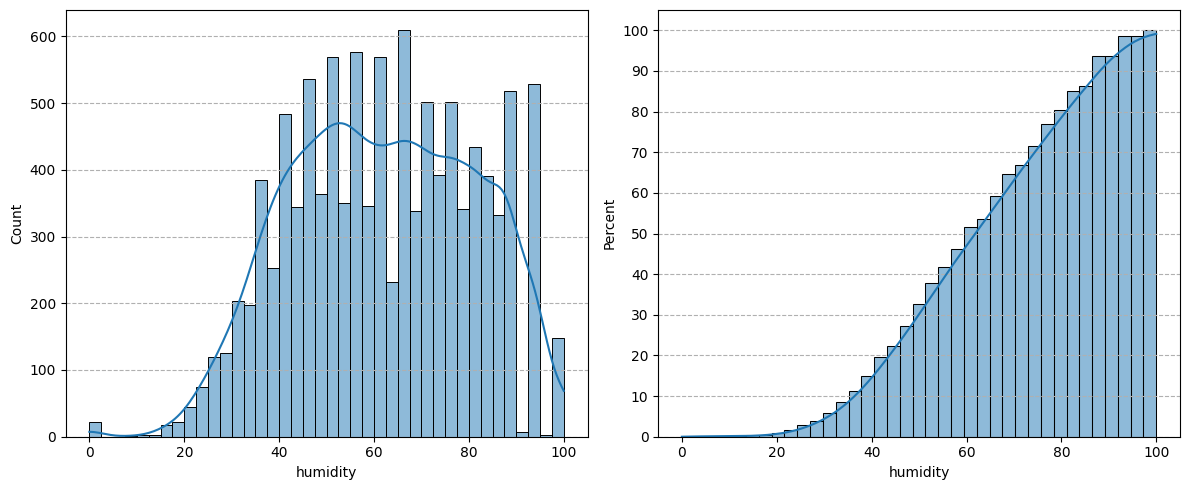

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='humidity', kde=True, bins=40)
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='humidity', kde=True, cumulative=True, stat='percent')
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

In [ ]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

- The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.
- More than 80 % of the time, the humidity value is greater than 80. Thus for most of the time, humidity level varies from optimum to too moist.

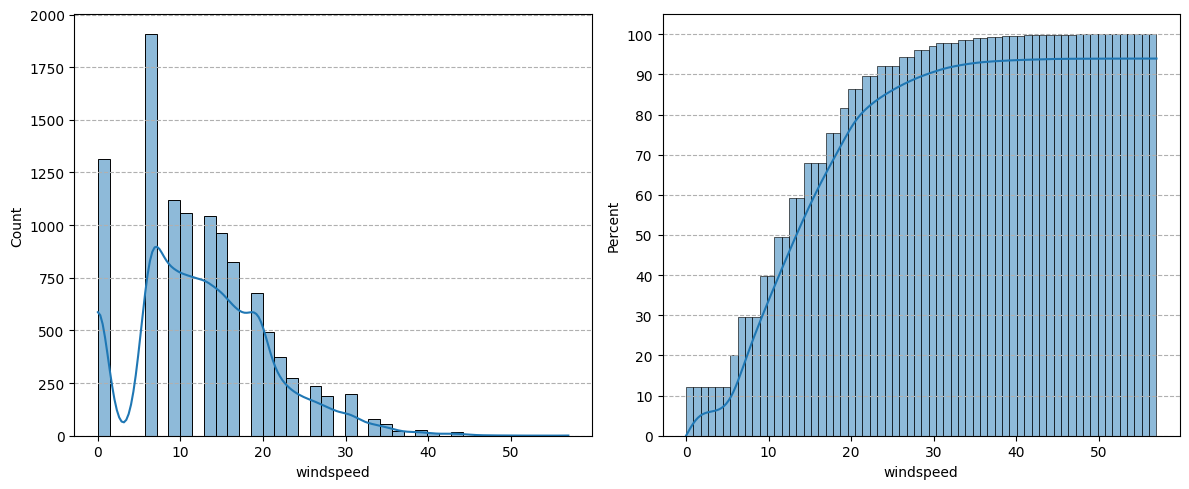

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='windspeed', kde=True, bins=40)
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='windspeed', kde=True, cumulative=True, stat='percent')
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

In [ ]:
windspeed_mean = np.round(df['windspeed'].mean(), 2)
windspeed_std = np.round(df['windspeed'].std(), 2)
windspeed_mean, windspeed_std

(12.8, 8.16)

- The mean and the standard deviation of the windspeed column is 12.8 and 8.16 respectively.
- More than 85 % of the total windspeed data has a value of less than 20.

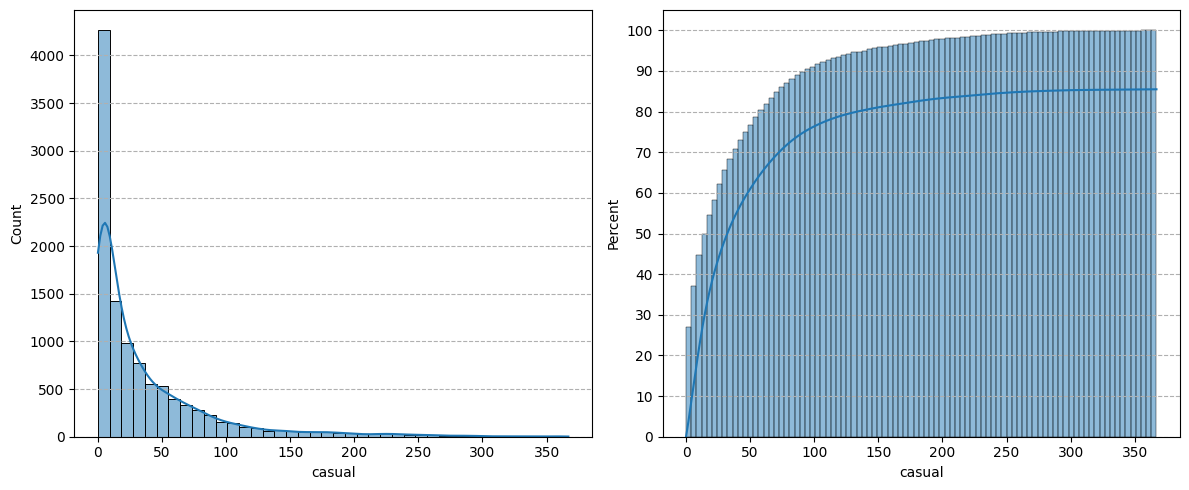

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='casual', kde=True, bins=40)
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='casual', kde=True, cumulative=True, stat='percent')
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

In [ ]:
casual_mean = np.round(df['casual'].mean(), 2)
casual_std = np.round(df['casual'].std(), 2)
casual_mean, casual_std

(36.02, 49.96)

- The mean and the standard deviation of the casual(count of casual users) column is 36.02 and 49.96 respectively.
- More than 80 % of the total casual(count of casual users) data has a value of less than 60.

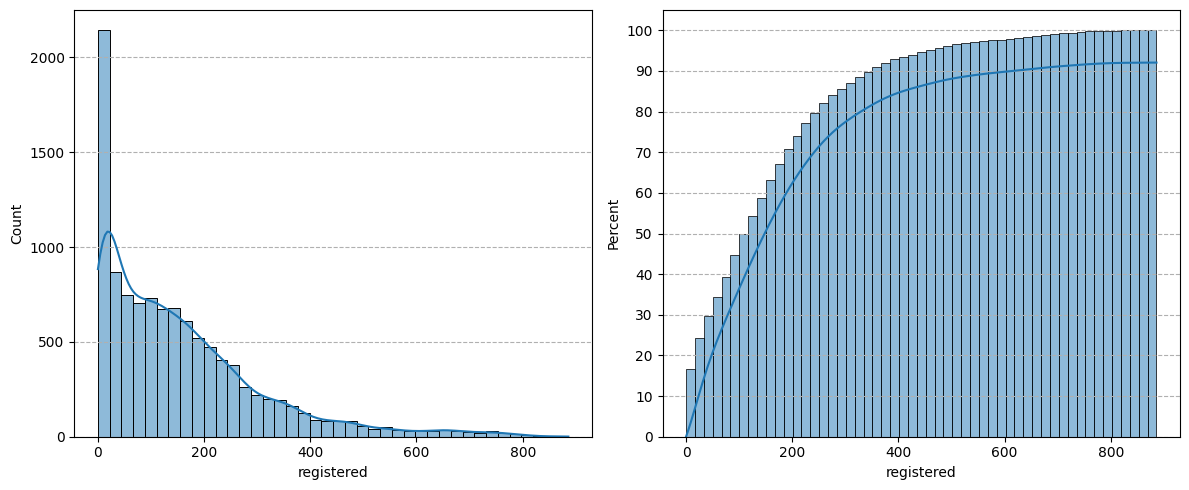

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='registered', kde=True, bins=40)
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='registered', kde=True, cumulative=True, stat='percent')
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

In [ ]:
registered_mean = np.round(df['registered'].mean(), 2)
registered_std = np.round(df['registered'].std(), 2)
registered_mean, registered_std

(155.55, 151.04)

- The mean and the standard deviation of the registered(count of registered users) column is 36.02 and 49.96 respectively.
- More than 80 % of the time, the registered (count of registered users) data is less than 300.

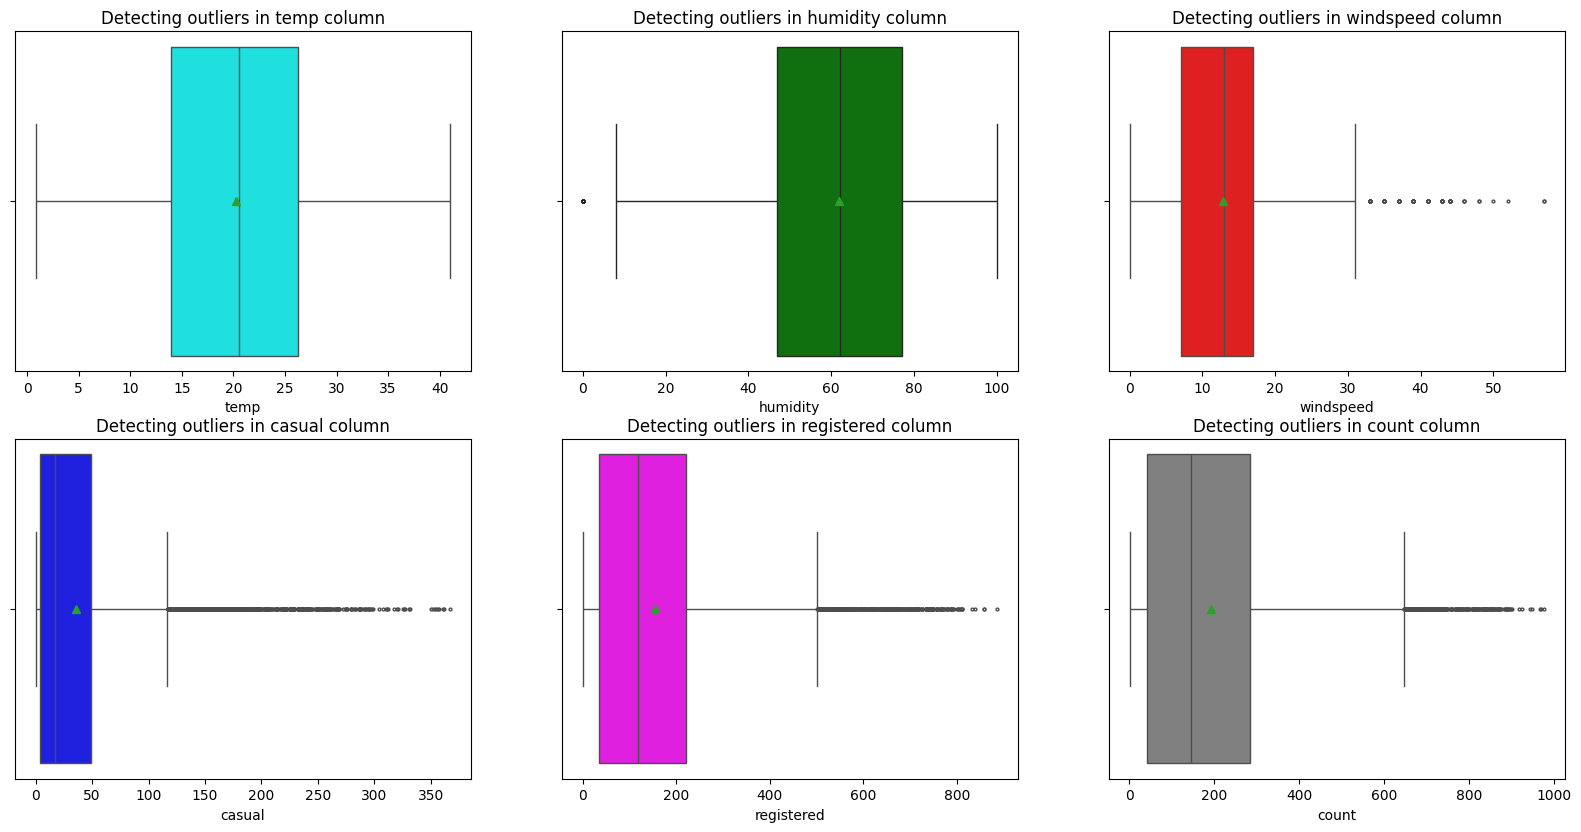

In [ ]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (20, 15))
for i in columns:
    plt.subplot(3, 3, count)
    plt.title(f"Detecting outliers in {i} column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

- There is no outlier in the temp column.
- There are few outliers present in humidity column.
- There are many outliers present in each of the columns : windspeed, casual, registered, count.

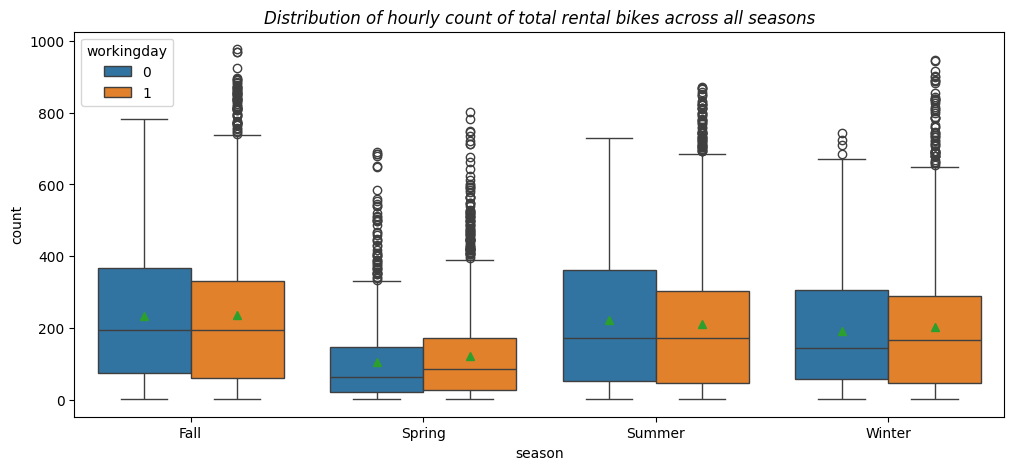

In [ ]:
plt.figure(figsize = (12, 5))
plt.title('Distribution of hourly count of total rental bikes across all seasons',fontdict = {'style' : 'oblique'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.show()

## **Is there any effect of Working Day on the number of electric cycles rented ?**

- Significance level or alpha = 0.05

- Null Hypothesis ( H0 ) - Working Day does not have any effect on the number of electric cycles rented.

- Alternate Hypothesis ( HA ) - Working Day has some effect on the number of electric cycles rented

In [ ]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
alpha = 0.05

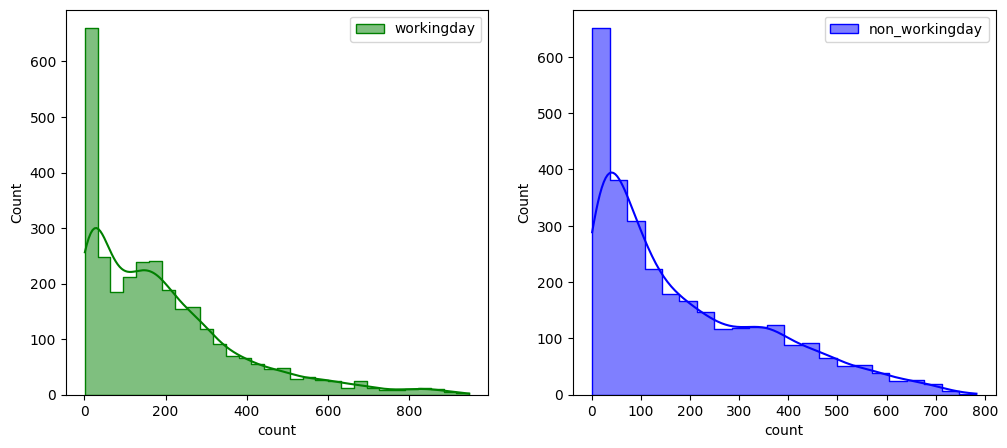

In [ ]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(3000), element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(3000), element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()

plt.show()

- The distributions does not follow normal distribution

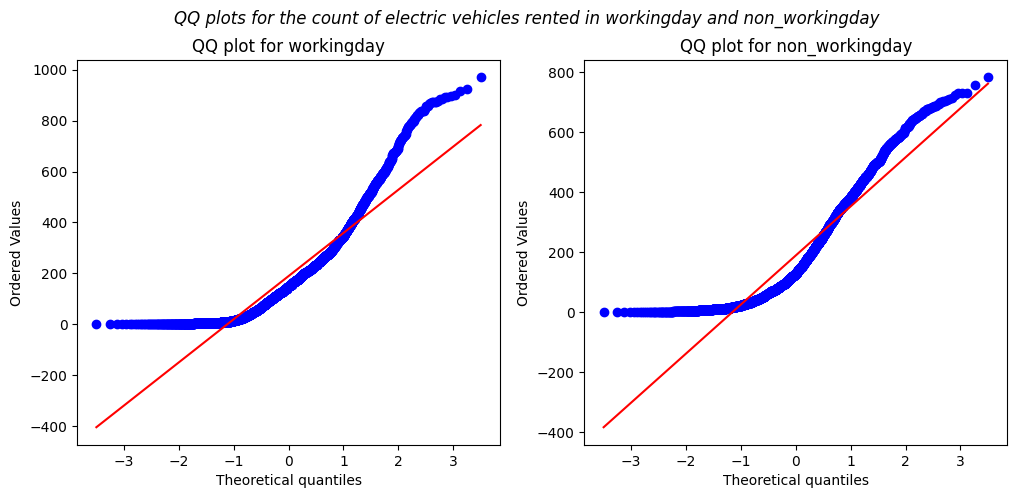

In [ ]:
# Distribution check using QQ Plo

plt.figure(figsize=(12, 5))
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday',fontdict = {'style' : 'oblique'})

plt.subplot(1, 2, 1)
probplot(df.loc[df['workingday'] == 1, 'count'].sample(3000), plot=plt, dist='norm')
plt.title('QQ plot for workingday')

plt.subplot(1, 2, 2)
probplot(df.loc[df['workingday'] == 0, 'count'].sample(3000), plot=plt, dist='norm')
plt.title('QQ plot for non_workingday')

plt.show()

- The distributions does not follow normal distribution.

In [ ]:
# Applying Shapiro-Wilk test for normality

test_stat, p_value = shapiro(df.loc[df['workingday'] == 1, 'count'].sample(3000))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  1.401298464324817e-44
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df.loc[df['workingday'] == 0, 'count'].sample(3000))
print('p-value : ', p_value)
if p_value < alpha :
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  3.14171115701624e-42
The sample does not follow normal distribution


In [ ]:
# Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

transformed_workingday = boxcox(df.loc[df['workingday'] == 1, 'count'])[0]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    test_stat, p_value = shapiro(transformed_workingday)

print('p-value : ', p_value)
if p_value < alpha :
    print('The sample does not follow normal distribution')
else:
    print('The sample follows a normal distribution')

p-value :  1.6132153862898905e-33
The sample does not follow normal distribution


In [ ]:
transformed_non_workingday = boxcox(df.loc[df['workingday'] == 0, 'count'])[0]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    test_stat, p_value = shapiro(transformed_non_workingday)

print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows a normal distribution')

p-value :  8.133891151192298e-24
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.

In [ ]:
# Homogeneity of Variances using Lavene's test

test_stat, p_value = levene(df.loc[df['workingday'] == 1, 'count'].sample(3000),
                                df.loc[df['workingday'] == 0, 'count'].sample(3000))
print('p-value : ', p_value)
if p_value < alpha:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value :  0.6487243013808572
The samples have Homogenous Variance 


- Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value : ',p_value)
if p_value < alpha:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value :  0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


### Result : Therefore, the mean hourly count of the total rental electric cycles is statistically same for both working and non- working days .

## Is the number of cycles rented is similar or different in different season ?


- Significance level or alpha = 0.05
- Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for all seasons.

- Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for all seasons.

In [ ]:
alpha = 0.05

In [ ]:
df_season_spring = df.loc[df['season'] == 'Spring', 'count']
df_season_summer = df.loc[df['season'] == 'Summer', 'count']
df_season_fall = df.loc[df['season'] == 'Fall', 'count']
df_season_winter = df.loc[df['season'] == 'Winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

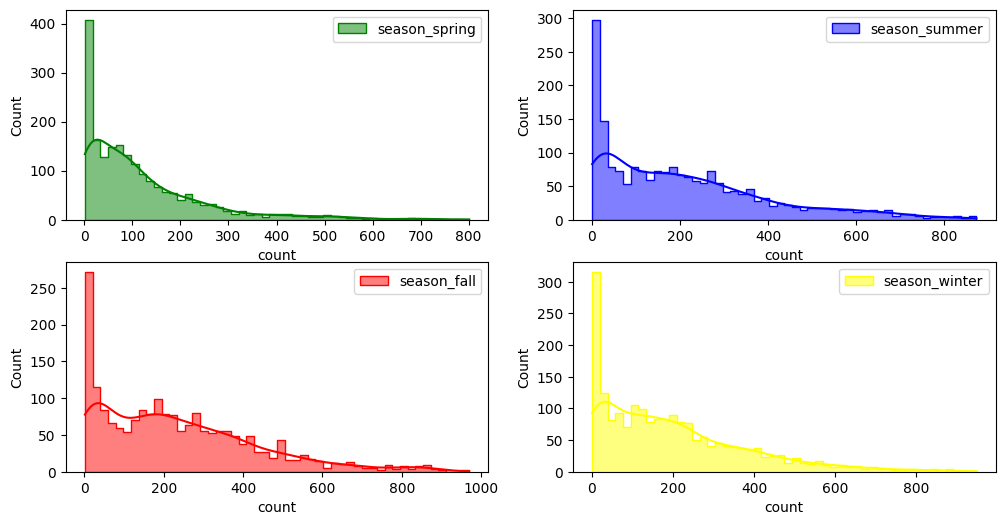

In [ ]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2000), bins = 50, element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2000), bins = 50, element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2000), bins = 50, element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2000), bins = 50, element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()

plt.show()

-  The distributions do not follow normal distribution.

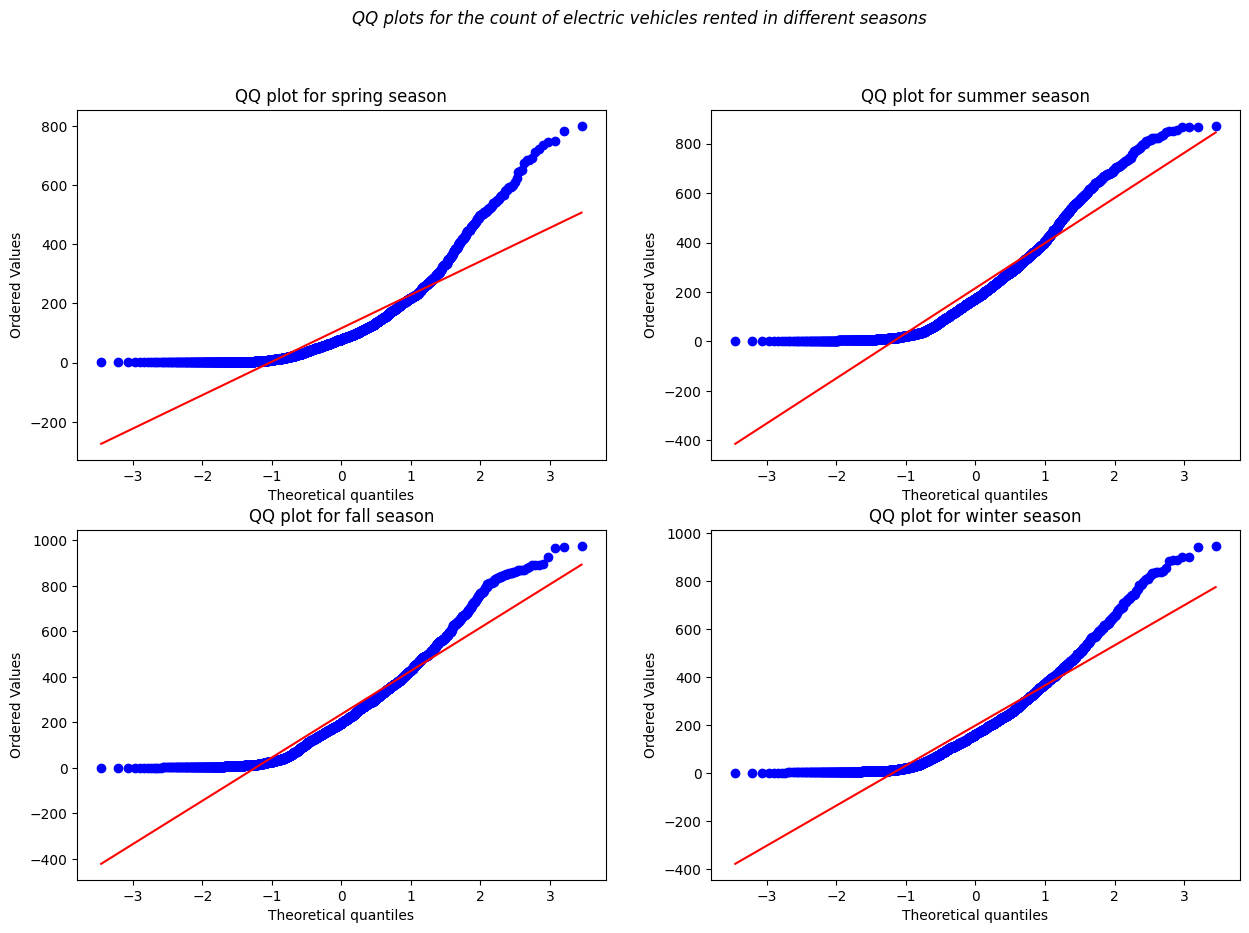

In [ ]:
# Distribution check using QQ Plot

plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons',fontdict = {'style' : 'oblique'})

probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')

plt.show()

- The distributions do not follow normal distribution.

In [ ]:
# Applying Shapiro-Wilk test for normality

test_stat, p_value = shapiro(df_season_spring.sample(2000))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  4.624284932271896e-43
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_summer.sample(2000))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  1.7090477928294179e-34
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_fall.sample(2000))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  4.5910442381605245e-32
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_winter.sample(2000))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  1.728391964342952e-35
The sample does not follow normal distribution


In [ ]:
# Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

transformed_df_season_spring = boxcox(df_season_spring.sample(2000))[0]
test_stat, p_value = shapiro(transformed_df_season_spring)
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  2.9860571074168465e-14
The sample does not follow normal distribution


In [ ]:
transformed_df_season_summer = boxcox(df_season_spring.sample(2000))[0]
test_stat, p_value = shapiro(transformed_df_season_summer)
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  1.3456881889730744e-14
The sample does not follow normal distribution


In [ ]:
transformed_df_season_fall = boxcox(df_season_spring.sample(2000))[0]
test_stat, p_value = shapiro(transformed_df_season_fall)
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  1.7678572025877325e-14
The sample does not follow normal distribution


In [ ]:
transformed_df_season_winter = boxcox(df_season_spring.sample(2000))[0]
test_stat, p_value = shapiro(transformed_df_season_winter)
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  3.858989357582868e-15
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution

In [ ]:
# Homogeneity of Variances using Levene's test

test_stat, p_value = levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value : ', p_value)
if p_value < alpha:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value :  1.2017856685011735e-116
The samples do not have  Homogenous Variance


- Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
test_stat, p_value = kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('p_value =', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

p_value = 2.479008372608633e-151
Reject Null Hypothesis


### Results :  Therefore, the number of rental cycles is statistically different for different seasons.

## **Is the number of cycles rented is similar or different in different weather ?**

In [ ]:
def weather_category(x):
    if x == 'Clear, Few clouds, partly cloudy, partly cloudy':
        return 1
    elif x == 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist':
        return 2
    elif x == 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':
        return 3
    else:
        return 4
df['weather'] = df['weather'].apply(weather_category)

In [ ]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

- Significance level or alpha = 0.05
-  We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group.
- Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3.
- Alternate Hypothesis ( HA ) - Mean of cycle rented per hour is different for all weather.

In [ ]:
alpha = 0.05

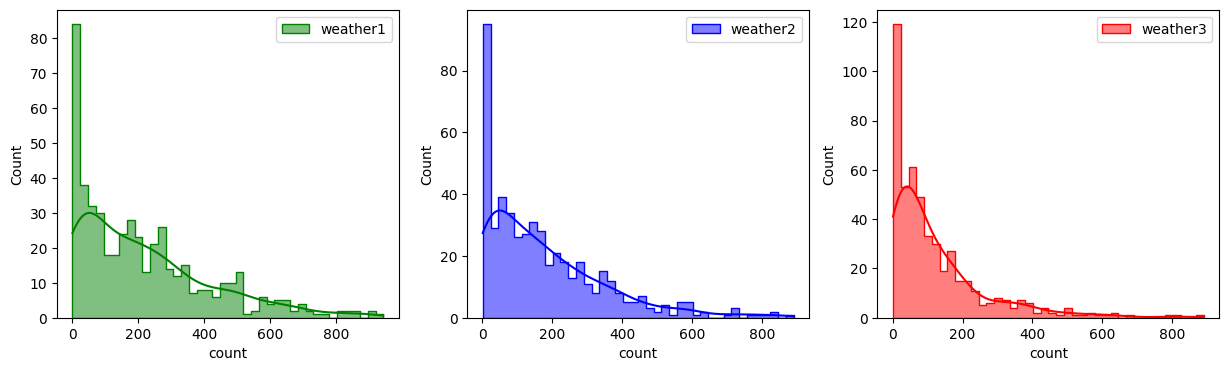

In [ ]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40, element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40, element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40, element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()

plt.show()

- The distributions do not follow normal distribution.

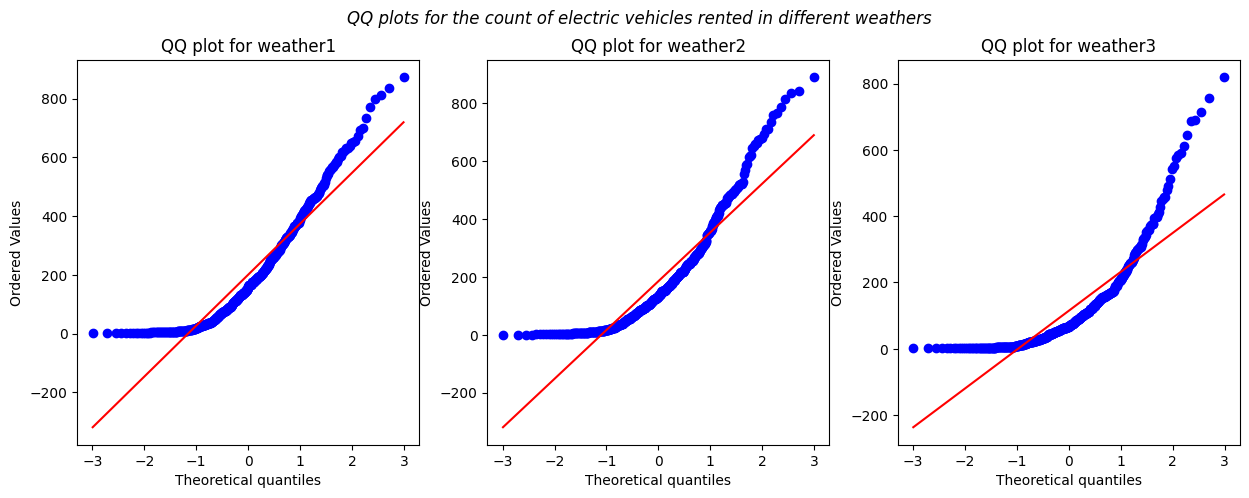

In [ ]:
# Distribution check using QQ Plot

plt.figure(figsize = (15, 5))
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers',fontdict = {'style' : 'oblique'})

plt.subplot(1, 3, 1)
probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')

plt.subplot(1, 3, 2)
probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')

plt.subplot(1, 3, 3)
probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')

plt.show()

In [ ]:
# Applying Shapiro-Wilk test for normality

test_stat, p_value = shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  7.99701143208424e-17
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  9.625768439381575e-19
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  2.6238733976863616e-26
The sample does not follow normal distribution


In [ ]:
# Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

transformed_weather1 = boxcox(df_weather1.loc[:, 'count'].sample(500))[0]
test_stat, p_value = shapiro(transformed_weather1)
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  2.420556256765849e-06
The sample does not follow normal distribution


In [ ]:
transformed_weather2 = boxcox(df_weather2.loc[:, 'count'].sample(500))[0]
test_stat, p_value = shapiro(transformed_weather2)
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  5.879966238353518e-07
The sample does not follow normal distribution


In [ ]:
transformed_weather3 = boxcox(df_weather3.loc[:, 'count'].sample(500))[0]
test_stat, p_value = shapiro(transformed_weather3)
print('p-value : ', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value :  0.00015908734349068254
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

In [ ]:
# Homogeneity of Variances using Levene's test

test_stat, p_value = levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value : ', p_value)
if p_value < alpha:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value :  2.4851693658532804e-07
The samples do not have  Homogenous Variance


- Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
test_stat, p_value = kruskal(df_weather1, df_weather2, df_weather3)
print('p value =', p_value)

if p_value.all() < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

p value = [1.08783632e-03 3.78605818e-09 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45]
Reject Null Hypothesis


### Results : Therefore, the number of rental cycles is statistically different for different weathers.

### **Is Weather dependent on season ?**

- Significance level or alpha = 0.05

- Null Hypothesis ( H0 ) - weather is independent of season

- Alternate Hypothesis ( HA ) - weather is dependent of seasons.

- Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

- The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level.

In [ ]:
alpha = 0.05

In [ ]:
# Applying Chi-square Test

cross_table = pd.crosstab(index=df['season'],
                          columns=df['weather'],
                          values=df['count'],
                          aggfunc=np.sum).replace(np.nan, 0)

cross_table

weather,1,2,3,4
season,,,,
Fall,470116,139386,31160,0
Spring,223009,76406,12919,164
Summer,426350,134177,27755,0
Winter,356588,157191,30255,0


In [ ]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]])

In [ ]:
chi_test_stat, p_value, dof, expected = chi2_contingency(observed = cross_table)
print('p_value : ', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

p_value :  0.0
Reject Null Hypothesis


### Results : Therefore, there is statistically significant dependency of weather and season based on the number of cycles rented.

### **Recommendations**

- Given the evident seasonal pattern in cycles rental counts, Yulu can adapt its marketing strategies strategically. Concentrate on promoting cycles rentals during the spring and summer seasons when demand peaks. Consider offering seasonal incentives or exclusive packages to entice more customers during these periods.

- Leverage the hourly fluctuations in cycles rental counts throughout the day. Explore the implementation of dynamic time-based pricing, where rental rates are adjusted to be more affordable during off-peak hours and slightly higher during peak hours. This approach can motivate customers to rent cycles during less congested times, optimizing resource utilization.

- Considering that approximately 81% of users are registered, and the remaining 19% are casual users, Yulu can tailor its marketing and communication strategies with precision. Offer loyalty programs, exclusive incentives, or personalized recommendations to registered users, fostering repeat business. For casual users, emphasize seamless rental experiences and highlight the advantages of cycles rentals for occasional use.